<a href="https://colab.research.google.com/github/SawsanYusuf/Housing-in-Colombia/blob/main/1_price_with_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+3"><strong>Predicting Price with Size</strong></font>

In [ ]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

warnings.simplefilter(action="ignore", category=FutureWarning)

In this project, we’re working for a client who wants to create a model that can predict the price of
houses in the city of Bogotá — with a focus on houses that cost less than $400,000
USD.

# Prepare Data

## Import

In normal conditions, we can clean our data files one-by-one. This isn't an issue when you're working with just tow or three files, but imagine if you had several hundred! One way to automate the data importing and cleaning process is by writing a **function**.

This will make sure that all our data undergoes the same process, and that our analysis is easily reproducible — something that's very important in science in general and data science in particular.

In [ ]:
def wrangle(filepath):
    #import_csv
    df = pd.read_csv(filepath,index_col=[0])

    return df

Now that we have a function written, let's test it out on one of the CSV files we'll use in this project.

In [ ]:
df = wrangle("colombia-real-estate.csv")
print("df shape:", df.shape)
df.head()

df shape: (6804, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,store,|Colombia|Antioquia|,"6.12182271,-75.42727947",1.700000e+08,COP,1.713305e+08,57401.01,NaN,25.0,NaN,6.800000e+06,NaN,NaN,NaN,http://antioquia-colombia.properati.com.co/jjh...
1,sell,store,|Colombia|Antioquia|,"6.11051488,-75.45238495",1.600000e+09,COP,1.612523e+09,540244.86,2600.0,1100.0,207.786485,1.454545e+06,NaN,NaN,NaN,http://antioquia-colombia.properati.com.co/jji...
2,sell,house,|Colombia|Antioquia|Rionegro|,"6.15028325,-75.37891388",9.500000e+08,COP,9.574354e+08,320770.38,1000.0,290.0,320.770380,3.275862e+06,NaN,3.0,NaN,http://rionegro-antioquia.properati.com.co/jjk...
3,sell,house,|Colombia|Antioquia|Rionegro|,"6.140373,-75.412345",4.000000e+08,COP,4.031307e+08,135061.21,92.0,150.0,1468.056630,2.666667e+06,NaN,3.0,NaN,http://rionegro-antioquia.properati.com.co/jjm...
4,sell,house,|Colombia|Antioquia|,"6.057394,-75.502792",8.500000e+08,COP,8.566528e+08,287005.08,359.0,250.0,799.457047,3.400000e+06,NaN,6.0,NaN,http://antioquia-colombia.properati.com.co/jjp...


At this point, our DataFrame `df` have 6,804 observations.

**Subset  to propertes in '"Bogotá D.C"'**

For this project, we want to build a model for houses in Bogotá proper (`"Bogotá D.C"`) that cost less than \$400,000. Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. So our first cleaning task is to remove those observations from our dataset. Since we're using a function to import and clean our data, we'll need to make changes there.

In [ ]:
def wrangle(filepath):
    #import_csv
    df = pd.read_csv(filepath,index_col=[0])

    #subset to propertes in '"Bogotá D.C"'
    mask_ba= df["place_with_parent_names"].str.contains("Bogotá D.C")

    #subset for  '"apartment"'
    mask_apt=df["property_type"] == "house"

    #subset where '"price_aprox_usd"' < 400,000
    mask_price= df["price_aprox_usd"] < 400_000

    df= df[mask_ba & mask_apt & mask_price]

    return df

In [ ]:
df = wrangle("colombia-real-estate.csv")
print("df shape:", df.shape)
df.head()

df shape: (1744, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
132,sell,house,|Colombia|Bogotá D.C|Usaquén|,"4.724,-74.023",6.300000e+08,COP,6.349309e+08,212721.41,NaN,135.0,NaN,4.666667e+06,NaN,3.0,NaN,http://usaquen-bogota-d-c.properati.com.co/jm3...
134,sell,house,|Colombia|Bogotá D.C|Los Mártires|,"4.618,-74.081",5.000000e+08,COP,5.039134e+08,168826.52,NaN,240.0,NaN,2.083333e+06,NaN,3.0,NaN,http://los-martires-bogota-d-c.properati.com.c...
138,sell,house,|Colombia|Bogotá D.C|Suba|,"4.729,-74.053",3.950000e+08,COP,3.980916e+08,133372.95,NaN,134.0,NaN,2.947761e+06,NaN,3.0,NaN,http://suba-bogota-d-c.properati.com.co/jm4g_v...
141,sell,house,|Colombia|Bogotá D.C|Usaquén|,"4.667,-74.05",1.100000e+09,COP,1.108609e+09,371418.34,NaN,143.0,NaN,7.692308e+06,NaN,3.0,NaN,http://usaquen-bogota-d-c.properati.com.co/jm4...
143,sell,house,|Colombia|Bogotá D.C|Suba|,"4.702,-74.06",7.000000e+08,COP,7.054787e+08,236357.12,NaN,248.0,NaN,2.822581e+06,2.0,4.0,NaN,http://suba-bogota-d-c.properati.com.co/jm5d_v...


## 1.2. Explore

Let's look at the distribution of apartment sizes in our dataset.

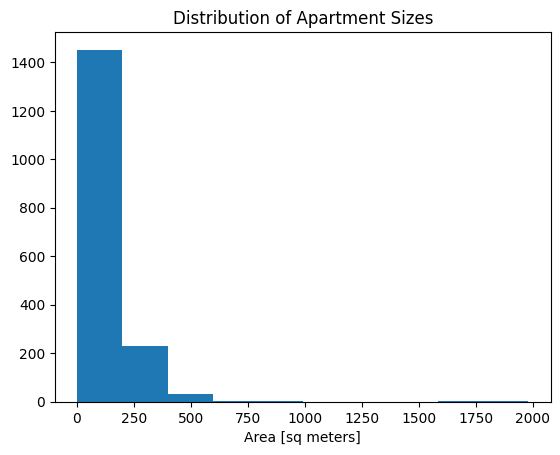

In [ ]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

Yikes! When you see a histogram like the one above, it suggests that there are outliers in our dataset. This can affect model performance — especially in the sorts of linear models. To confirm, let's look at the summary statistics for the `"surface_covered_in_m2"` feature.

In [ ]:
df.describe()["surface_covered_in_m2"]

count    1718.000000
mean      140.550640
std       104.223398
min         3.000000
25%        80.000000
50%       116.000000
75%       170.000000
max      1980.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are
smaller that 170, there are some that are several thousand square meters. The best
thing to do is to change our wrangle function and remove them from the dataset.

In [ ]:
def wrangle(filepath):
    #import_csv
    df = pd.read_csv(filepath,index_col=[0])

    #subset to propertes in '"Bogotá D.C"'
    mask_ba= df["place_with_parent_names"].str.contains("Bogotá D.C")

    #subset for  '"apartment"'
    mask_apt=df["property_type"] == "house"

    #subset where '"price_aprox_usd"' < 400,000
    mask_price= df["price_aprox_usd"] < 400_000

    df= df[mask_ba & mask_apt & mask_price]

    #Remove the outliers by '"surface_covered_in_m2"'
    low, high= df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area =df["surface_covered_in_m2"].between(low, high)
    df=df[mask_area]

    return df

In [ ]:
df = wrangle("colombia-real-estate.csv")
print("df shape:", df.shape)
df.head()

df shape: (1377, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
132,sell,house,|Colombia|Bogotá D.C|Usaquén|,"4.724,-74.023",6.300000e+08,COP,6.349309e+08,212721.41,NaN,135.0,NaN,4.666667e+06,NaN,3.0,NaN,http://usaquen-bogota-d-c.properati.com.co/jm3...
134,sell,house,|Colombia|Bogotá D.C|Los Mártires|,"4.618,-74.081",5.000000e+08,COP,5.039134e+08,168826.52,NaN,240.0,NaN,2.083333e+06,NaN,3.0,NaN,http://los-martires-bogota-d-c.properati.com.c...
138,sell,house,|Colombia|Bogotá D.C|Suba|,"4.729,-74.053",3.950000e+08,COP,3.980916e+08,133372.95,NaN,134.0,NaN,2.947761e+06,NaN,3.0,NaN,http://suba-bogota-d-c.properati.com.co/jm4g_v...
141,sell,house,|Colombia|Bogotá D.C|Usaquén|,"4.667,-74.05",1.100000e+09,COP,1.108609e+09,371418.34,NaN,143.0,NaN,7.692308e+06,NaN,3.0,NaN,http://usaquen-bogota-d-c.properati.com.co/jm4...
143,sell,house,|Colombia|Bogotá D.C|Suba|,"4.702,-74.06",7.000000e+08,COP,7.054787e+08,236357.12,NaN,248.0,NaN,2.822581e+06,2.0,4.0,NaN,http://suba-bogota-d-c.properati.com.co/jm5d_v...


Now that our dataset is free of outliers, it’s time to start exploring the relationship between apartment size and price.

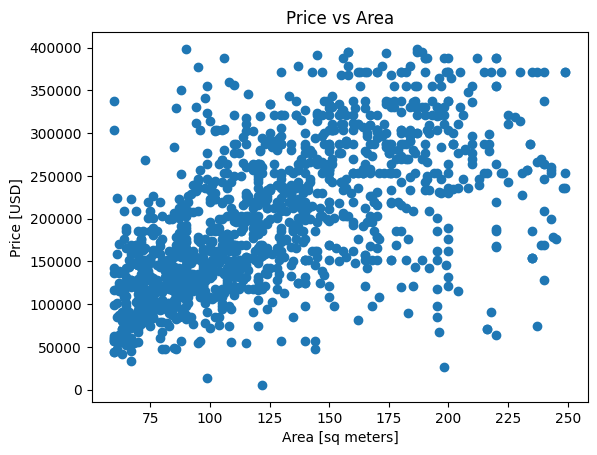

In [ ]:
plt.scatter(x= df["surface_covered_in_m2"], y= df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

This plot suggests that there’s a moderate positive correlation between apartment price and size.
This means that if thing we want to predict is price, size will be a good feature to include.

## 1.3 Split

A key part in any model-building project is separating y
our **target** (the thing we want to predict)
from our **features** (the information our model will use to make its predictions). Since this is our
first model, we’ll use just one feature: apartment size.

In [ ]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1377, 1)

Now that we have a features, the next step is to create a target. (By the way, we’re adding a `_train` tag to the variable names for our feature matrix and target vector.
This is to remind us that this is the data we’ll use to train our model, and not the data we’ll use
to test it.)

In [ ]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1377,)

# 2 Build Model

## 2.1 Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the
model you build is performing well?

One way to think about this is to see how a “dumb” model
would perform on the same data. Some people also call this a naïve or baseline model, but it’s
always a model makes only one prediction — in this case, it predicts the same price regardless of
an apartment’s size. So let’s start by figuring out what our baseline model’s prediction should be.

In [ ]:
y_mean = y_train.mean()
y_mean

195596.97349310093

Now that we have the one prediction that our dumb model will always make, we need to generate
a list that repeats the prediction for every observation in our dataset.

In [ ]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[195596.97349310093,
 195596.97349310093,
 195596.97349310093,
 195596.97349310093,
 195596.97349310093]

So how does our baseline model perform? One way to evaluate it is by plotting it on top of the
scatter plot we made above.

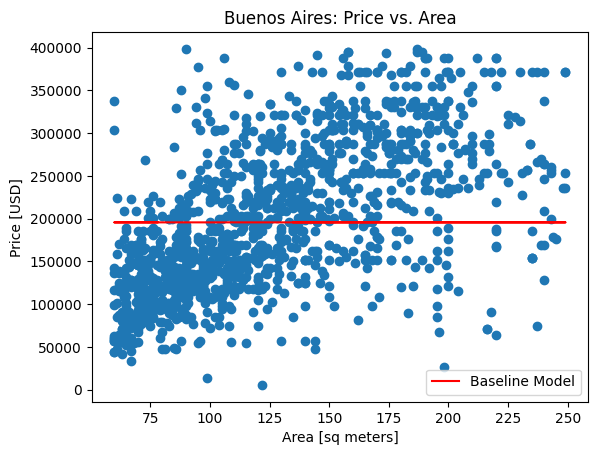

In [ ]:
plt.plot(X_train, y_pred_baseline, color="red", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

Looking at this visualization, it seems like our baseline model doesn’t really follow the trend in
the data. But, as a data scientist, you can’t depend only on a subjective plot to evaluate a model.
You need an exact, mathematically calculate performance metric. There are lots of performance
metrics, but the one we’ll use here is the **mean absolute error**.

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 195596.97
Baseline MAE: 72274.36


What does this information tell us? If we always predicted that an apartment price is \$195,596.97,
our predictions would be off by an average of \$72,274.36. It also tells us that our model needs to
have mean absolute error below \$72,274.36 in order to be useful.

## 2.2 Iterate
The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you’re happy with the model’s performance. Even
though the model we’re building is linear, the iteration process rarely follows a straight line. Be
prepared for trying new things, hitting dead-ends, and waiting around while your computer does
long computations to train your model. Let’s get started!

The first thing we need to do is create our model — in this case, one that uses **linear regression**.

In [ ]:
model = LinearRegression()

The second thing we need to do is use our data to train our model. Another way to say this is fit
our model to the training data.

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

## 2.3 Evaluate

The final step is to evaluate our model. In order to do that, we’ll start by seeing how well it
performs when making predictions for data that it saw during training. So let’s have it predict the
price for the houses in our training set.

In [ ]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([207060.82585798, 326831.11953354, 205920.1563944 , 216186.18156659,
       335956.47524216])

Now that we have predictions, we’ll use them to assess our model’s performance with the training
data. We’ll use the same metric we used to evaluate our baseline model: mean absolute error.

In [ ]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 52093.88


Good news: Our model beat the baseline by over $20,000! That’s a good indicator that it will be
helpful in predicting apartment prices. But the real test is how the model performs on data that
it hasn’t seen before, data that we call the test set.

Tip: Make sure the `X_train` you used to train your model has the same column order as `X_test`.
Otherwise, it may hurt your model’s performance.

In [ ]:
df_test = wrangle("colombia-real-estate-test.csv")

In [ ]:
X_test = df_test[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    224170.867812
1    452304.760527
2    216186.181567
3    347363.169878
4    152308.691606
dtype: float64

Ideally, you want your test performance metrics to be the same as its training performance metrics.
In practice, test metrics tend to be a little worse (this means a larger number in the case of mean
absolute error). But as long as the training and test performance are close to each other, you can
be confident that your model will generalize well.


**Warning**: During the iteration phase, you can change and retrain your model as many times as you
want. You can also check the model’s training performance repeatedly. But once you evaluate its
test performance, you can’t make any more changes.


A test only counts if neither the model nor the data scientist has seen the data before. If you check
your test metrics and then make changes to the model, you can introduce biases into the model
that compromise its generalizability.

# 3 Communicate Results

Once your model is built and tested, it’s time to share it with others. If you’re presenting to simple
linear model to a technical audience, they might appreciate an equation. When we created our
baseline model, we represented it as a line. The equation for a line like this is usually written as:

$\Huge{y = mx+ b}$

Since data scientists often work with more complicated linear models, they prefer to write the
equation as:

$\Huge{y = β_0+ β_1X_1}$


Regardless of how we write the equation, we need to find the values that our model has determined
for the intercept and and coefficient. Fortunately, all trained models in scikit-learn store this
information in the model itself. Let’s start with the intercept.

In [ ]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)

Model Intercept: 53070.45


In [ ]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 1140.67


Now that we have our intercept and coefficient, we need to insert them into a string that we
can print out the complete equation.

In [ ]:
print(f"house_price = {intercept} + {coefficient} * surface_covered_in_m2")

house_price = 53070.45 + 1140.67 * surface_covered_in_m2


Equation might work for some technical audiences, but visualization or generally much more effective communication tool — especially for non-technical audiences. So let’s use the scatter plot we
made at the beginning of this notebook and plot the line that that are equation would make.

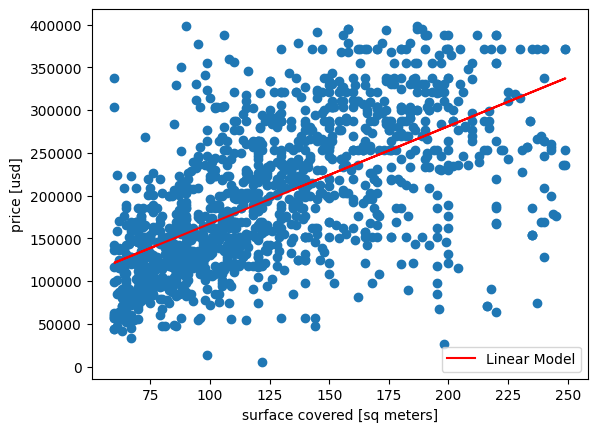

In [ ]:
plt.plot(X_train, y_pred_training, color="red", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();